<a href="https://colab.research.google.com/github/dindamareta/Bank-Marketing-Classification/blob/master/Bank_Marketing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Course - Telkom Digital Talent Incubator 2020*

Dinda Mareta Putriany
<br> DS0207

---

# *Bank Marketing Classification*

**Klasifikasi** merupakan salah satu topik utama dalam data mining atau machine learning, yaitu pengelompokan data yang memiliki kelas label atau target. Hasil dari klasifikasi berupa prediksi kelas label atau target terhadap data baru. Sehingga klasifikasi dikategorekan ke dalam *supervised learning* atau pembelajaran yang diawasi, yaitu kelas label ikut berperan sebagai *‘supervisor’* yang mengawasi proses pembelajaran dalam mencapai tingkat performansi tertentu. <br> <br>

Pada tugas kali ini diberikan *Bank Marketing Datasets* dari https://www.kaggle.com/janiobachmann/bank-marketing-dataset. Ini adalah kumpulan data bank pemasaran klasik yang diunggah awalnya di Repositori Pembelajaran Mesin UCI. Kumpulan data ini memberi informasi tentang kampanye pemasaran lembaga keuangan yang harus dianalisis. Data tersebut akan digunakan untuk mebangun model klasifikasi dengan target **‘deposit’** menggunakan algoritma **Decision Tree, KNN, Random Forest,** dan **Naive bayes**. Tujuan klasifikasi ini adalah untuk menentukan atau memprediksi apakah seseorang akan melakukan deposit ke dalam bank.

### *Import Library*

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pydotplus
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.plotting import plot_confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### *Import Dataset*

Data memiliki 17 atribut, dengan atribut **‘deposit’** sebagai kelas label atau target yang terdiri atas kelas **‘yes’** dan **‘no’**. Berikut merupakan *bank marketing dataset* yang berisi data kampanye pemasaran bank.
<br>
1. **age**: Usia calon nasabah. <br>
2. **job**: Pekerjaan calon nasabah (admin, technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student).<br>
3. **marital**: Status pernikahan nasabah (married, single, divorce).  <br>
4. **education**: Tingkat pendidikan nasabah (secondary, tertiary, primary, unknown). <br>
5. **default**: Memiliki kredit secara default atau tidak (yes, no). <br>
6. **balance**: Jumlah saldo nasabah . <br>
7. **housing**: Memiliki cicilan rumah atau tidak (yes, no). <br>
8. **loan**: Memiliki pinjaman pribadi atau tidak (yes, no). <br>
9. **contact**: Alat komunikasi yang digunakan (telephone, cellular, unknown). <br>
10. **day**: Terakhir dihubungi dalam hari. <br>
11. **month**: Terakhir dihubungi dalam bulan pada satu tahun (jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec). <br>
12. **duration**: Lama durasi dihubungi dalam detik. <br>
13. **campaign**: Jumlah kontak yang dilakukan kepada nasabah selama kampanye. <br>
14. **pdays**: Jumlah hari yang berlalu setelah nasabah terakhir kali dihubungi dari kampanye sebelumnya. <br>
15. **previous**: Jumlah kontak yang dilakukan kepada nasabah sebelum kampanye. <br>
16. **poutcome**:  Hasil dari kampanye pemasaran sebelumnya (unknown, other, failure, success). <br>
17. **deposit**: Nasabah melakukan melakukan deposit atau tidak (yes, no).

In [2]:
# Import Data 
df_bm = pd.read_csv('https://raw.githubusercontent.com/dindamareta/Bank-Marketing-Classification/master/Dataset/bank.csv')

# Show 5 first Row
df_bm.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Menampilkan Informasi Data

#### Menampilkan Informasi Umum

In [3]:
# Prints the Dataset Information
df_bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Dari informasi di atas, diketahui bahwa terdapat 11162 data dengan 2 tipe data yaitu numerik (7 atribut) dan objek (10 atribut).
- **Numerik**: age, balance, day, duration, campaign, pdays, previous
- **Objek**: job, marital, education, default, housing, loan, contact, month, poutcome, deposit.


#### Menampilkan Informasi Berdasarkan Statistik

In [4]:
# Prints Descriptive Statistics
df_bm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


#### Menampilkan Jumlah Data Tiap Kelas

In [5]:
# Menampilkan jumlah kelas pada atribut deposit
cls = df_bm['deposit'].value_counts()
print(cls)

no     5873
yes    5289
Name: deposit, dtype: int64


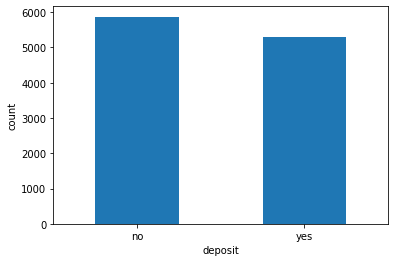

In [6]:
df_bm['deposit'].value_counts().plot(kind='bar', rot=0);
plt.xlabel("deposit")
plt.ylabel("count");

*Bar chart* di atas merupakan visualisasi jumlah data pada setiap kelas untuk atribut deposit.

## *Preprocessing* Data

Tujuannya adalah untuk membuat data menjadi ideal sebelum di proses. *Preprocessing* data dapat mengatasi beberapa masalah yaitu
1. Data Tidak Lengkap
    - Data hilang / Kosong
    - Kekurangan atribut tertentu atau atribut yang sesuai
    - Hanya berisi data agregat
2. Noise
    - Mengandung kesalahan
    - Mengandung data yang *outlier*
3. Tidak Konsisten
    - Mengandung perbedaan dalam kode atau nama

#### Mengecek Data Hilang/Kosong

Mengecek apakah terdapat data yang kosong atau tidak. Jika terdapat data kosong maka data tersebut akan diisi dengan median berdasarkan atributnya.

In [7]:
# Check for Missing Values
df_bm.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Berdasarkan data di atas diketahui bahwa tidak terdapat data yang kosong dan siap digunakan, sehingga tidak perlu menghitung median.

#### Encode Categorical Data

Seperti yang telah diketahui bahwa terdapat dua tipe data yaitu numerik dan objek. Fungsi pembelajaran mesin dalam sklearn mengharapkan atribut yang digunakan adalah atribut dengan tipe data numerik. Untuk mengonversinya, perlu menggunakan *encoding* yang mengacu pada proses transformasi tipe data objek menjadi bentuk numerik.

In [8]:
# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_bm[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']]))
df_encoded.columns = encoder.get_feature_names(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
df_bm['deposit'].replace('no',0, inplace=True)
df_bm['deposit'].replace('yes',1, inplace=True)

# Replace Categotical Data with Encoded Data
df_bm.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] ,axis=1, inplace=True)
df_encoded = pd.concat([df_bm, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,1,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,1,-1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,2,-1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,733,16,83,4,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,29,19,156,2,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,8,9,2,172,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Set Feature and Target

Langkah ini untuk menentukan atribut-atribut yang digunakan sebagai feature dan sebagai target

###### Select Feature

In [9]:
# Select Features
feature = df_encoded.drop(['deposit'], axis=1)
feature

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,1,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,2,-1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,733,16,83,4,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,29,19,156,2,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,8,9,2,172,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


###### Select Target

In [10]:
# Select Target
target = df_encoded['deposit']
target

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

### Set Training and Testing Data

Langkah ini digunakan untuk membagi data ke dalam data train dan data test dengan perbandingan 70:30 sebelum dilakukan klasifikasi

In [11]:
# Set Training and Testing Data (70:30)
X_train, X_test, y_train, y_test  = train_test_split(feature , target, shuffle = True, test_size=0.3, random_state=100)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7813, 51)
(3349, 51)
(7813,)
(3349,)


In [12]:
# Print data test
X_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1402,50,414,3,707,1,302,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9326,25,-289,13,56,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3380,84,81204,1,390,1,94,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7413,45,999,16,656,2,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10309,30,19358,19,258,2,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9318,34,34,30,379,1,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10290,42,2003,17,177,3,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6965,61,89,28,154,1,181,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
666,59,1634,5,836,1,-1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
# Print label test
y_test

1402     1
9326     0
3380     1
7413     0
10309    0
        ..
9318     0
10290    0
6965     0
666      1
5235     1
Name: deposit, Length: 3349, dtype: int64

## Metode Klasifikasi

Klasifikasi dilakukan dengan menggunakan 4 algoritma, yaitu **Decision Tree, Naive bayes, Random Forest** dan **KNN**. Hasil performansi setiap algoritma akan dibandingkan dan dianalisis.

### Decision Tree

*Decision tree* adalah salah satu metode klasifikasi dalam machine learning yang populer karena mudah untuk diinterpretasi oleh manusia. Decision tree membangun model prediksinya menggunakan struktur pohon keputusan atau struktur berhirarki.

##### Modeling Decision Tree

In [14]:
# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

# Predict to Test Data 
y_pred_dtc = dtc.predict(X_test)

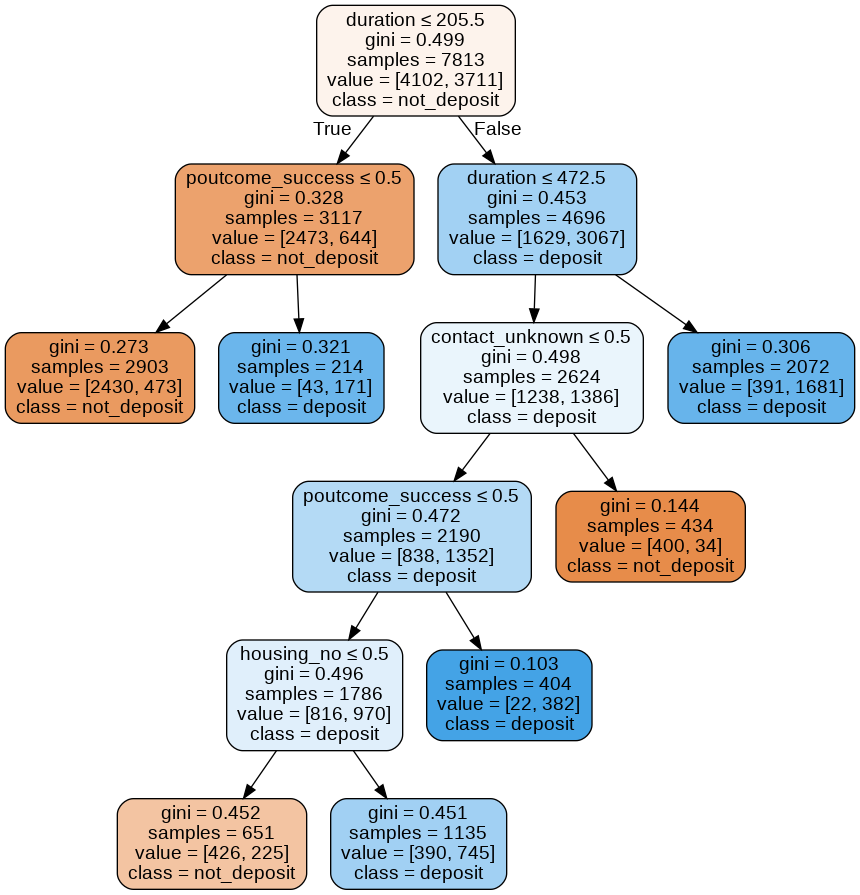

In [15]:
# Visualize Tree
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['not_deposit', 'deposit'],
                feature_names=['age',	'balance', 'day', 'duration',	'campaign',	'pdays',	'previous',	'job_admin.',	'job_blue-collar',	'job_entrepreneur',	'job_housemaid',	'job_management',	'job_retired',	
                               'job_self-employed', 'job_services',	'job_student',	'job_technician',	'job_unemployed',	'job_unknown', 'marital_divorced',	'marital_married',	'marital_single',	'education_primary',	
                               'education_secondary',	'education_tertiary',	'education_unknown', 'default_no','default_yes', 'housing_no', 'housing_yes',	'loan_no','loan_yes',	'contact_cellular',	'contact_telephone',	
                               'contact_unknown',	'poutcome_failure', 'month_apr',	'month_aug',	'month_dec',	'month_feb',	'month_jan',	'month_jul',	'month_jun', 'month_mar', 'month_may','month_nov','month_oct',
                               'month_sep', 'poutcome_other',	'poutcome_success',	'poutcome_unknown'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##### Model Evaluation

Evaluasi dilakukan untuk mengetahui seberapa baik model *Decision Tree* yang telah dibangun. Pada tahap evaluasi ini akan menampilkan *confusion matrix* dan *classification report* yang dihasilkan algoritma *Decision Tree*.

###### Confusion Matrix

Merepresentasikan kelas prediksi terhadap kelas sebenarnya yang dihasilkan oleh algoritma *Decision Tree*. Dengan kata lain menampilkan banyaknya data yang benar terklasifikasi dan yang salah terklasifikasi.

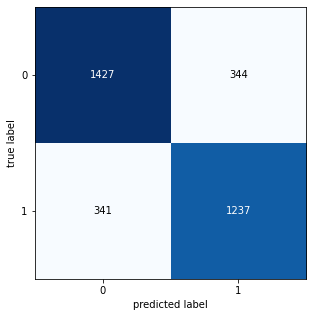

In [16]:
# Show the Confussion Matrix
cm1 = metrics.confusion_matrix(y_test, y_pred_dtc)
plot_confusion_matrix(cm1, figsize=(5,5))
plt.show()

###### Classification Report

Menampilkan perhitungan akurasi, *precision, recall, f1-score*, dan *cohens kappa score* sebagai performansi model yang telah dibangun.

In [17]:
# Print Classification Report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1771
           1       0.78      0.78      0.78      1578

    accuracy                           0.80      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.80      0.80      0.80      3349



In [18]:
# Show the Accuracy, Precision, Recall, F1 Score, Cohens Kappa Score
acc_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
prec_dtc = metrics.precision_score(y_test, y_pred_dtc)
rec_dtc = metrics.recall_score(y_test, y_pred_dtc)
f1_dtc = metrics.f1_score(y_test, y_pred_dtc)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_dtc)

print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.7954613317408181
Precision: 0.782416192283365
Recall: 0.7839036755386565
F1 Score: 0.7831592276036721
Cohens Kappa Score: 0.589602055867281


###### Visualisasi ROC Curve

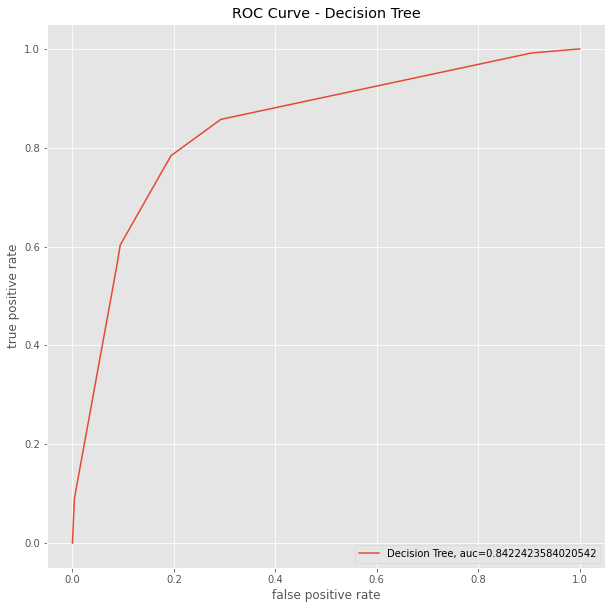

In [19]:
# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### Naive Bayes

*Naive Bayes* merupakan sebuah metode klasifikasi dengan menggunakan probabilitas dan statistik. Dalam artian lain *Naive Bayes* memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya. Ciri utama dari *classifier* ini adalah asumsi yg sangat kuat (naïf) akan independensi dari masing-masing kondisi/kejadian.

##### Modeling Naive Bayes

In [20]:
# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

##### Model Evaluation

Evaluasi dilakukan untuk mengetahui seberapa baik model *Naive Bayes* yang telah dibangun. Pada tahap evaluasi ini akan menampilkan *confusion matrix* dan *classification report* yang dihasilkan algoritma *Naive Bayes*.

###### Confusion Matrix

Merepresentasikan kelas prediksi terhadap kelas sebenarnya yang dihasilkan oleh algoritma *Naive Bayes*. Dengan kata lain menampilkan banyaknya data yang benar terklasifikasi dan yang salah terklasifikasi.

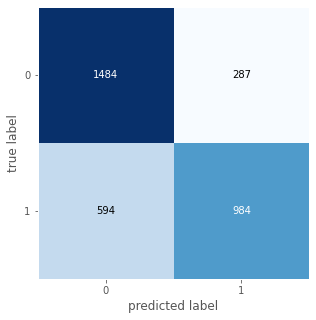

In [21]:
# Show the Confussion Matrix
cm2 = metrics.confusion_matrix(y_test, y_pred_gnb)
plot_confusion_matrix(cm2, figsize=(5,5))
plt.show()

###### Classification Report

Menampilkan perhitungan akurasi, *precision, recall, f1-score*, dan *cohens kappa score* sebagai performansi model yang telah dibangun.

In [22]:
# Print Classification Report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1771
           1       0.77      0.62      0.69      1578

    accuracy                           0.74      3349
   macro avg       0.74      0.73      0.73      3349
weighted avg       0.74      0.74      0.73      3349



In [23]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7369363989250522
Precision: 0.7741935483870968
Recall: 0.623574144486692
F1 Score: 0.6907686907686907
Cohens Kappa Score: 0.4664637139976764


###### Visualisasi ROC Curve

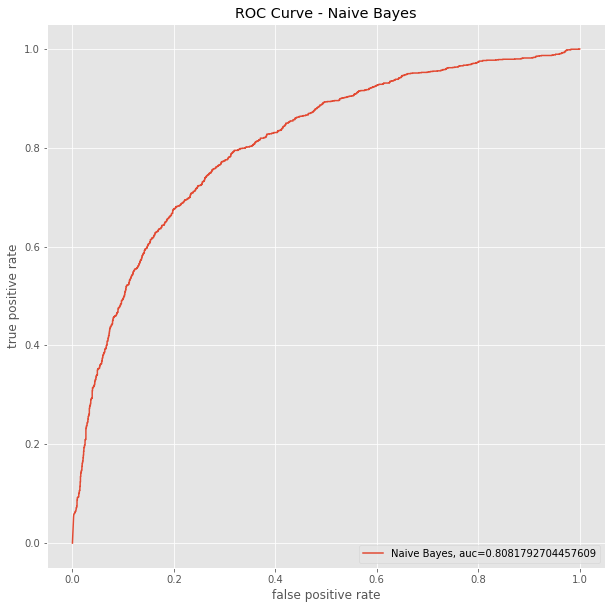

In [24]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### Random Forest

Random Forest (RF) adalah algoritma klasifikasi yang dikembangkan oleh Leo Breiman dan Adele Cutler
dengan basis *ensemble learning*. Dua metode *ensemble learning* yang populer adalah *boosting* dan *bagging*.
RF termasuk dalam metode *bagging* yang didasarkan dengan teknik dasar pohon keputusan (*decision tree*).
Kekuatan RF terletak pada seleksi ciri secara acak dan *replacement* untuk memilih setiap simpul (*node*), sehingga
mampu menghasilkan tingkat kesalahan yang relatif rendah.

##### Modeling Random Forest

In [25]:
# Modeling Random Forest
rf = RandomForestClassifier(n_estimators=90, random_state=0)
rf.fit(X_train, y_train)

# Predict to Test Data
y_pred_rf= rf.predict(X_test)

##### Model Evaluation

Evaluasi dilakukan untuk mengetahui seberapa baik model *Random Forest* yang telah dibangun. Pada tahap evaluasi ini akan menampilkan *confusion matrix* dan *classification report* yang dihasilkan algoritma *Random Forest*.

###### Confusion Matrix

Merepresentasikan kelas prediksi terhadap kelas sebenarnya yang dihasilkan oleh algoritma *Random Forest*. Dengan kata lain menampilkan banyaknya data yang benar terklasifikasi dan yang salah terklasifikasi.

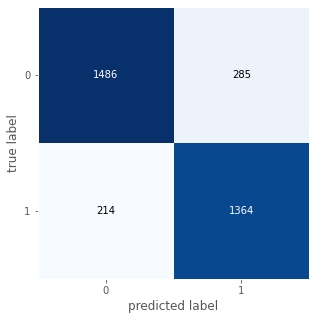

In [26]:
# Show the Confussion Matrix
cm3 = metrics.confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm3, figsize=(5,5))
plt.show()

###### Classification Report

Menampilkan perhitungan akurasi, *precision, recall, f1-score*, dan *cohens kappa score* sebagai performansi model yang telah dibangun.

In [27]:
# Print Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1771
           1       0.83      0.86      0.85      1578

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [28]:
# Show the Accuracy, Precision, Recall
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)
prec_rf = metrics.precision_score(y_test, y_pred_rf)
rec_rf = metrics.recall_score(y_test, y_pred_rf)
f1_rf = metrics.f1_score(y_test, y_pred_rf)
kappa_rf = metrics.cohen_kappa_score(y_test, y_pred_rf)

print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)
print("Cohens Kappa Score:", kappa_rf)

Accuracy: 0.851000298596596
Precision: 0.8271679805942995
Recall: 0.8643852978453739
F1 Score: 0.8453672141307716
Cohens Kappa Score: 0.7017388428548457


###### Visualisasi ROC Curve

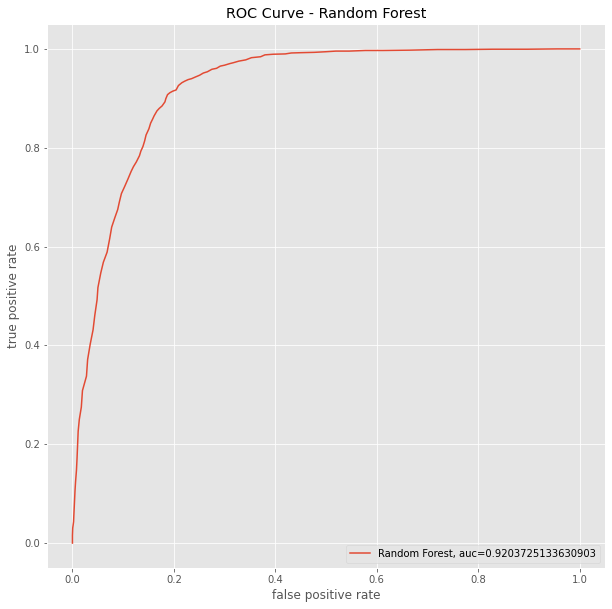

In [29]:
# ROC Curve
y_pred_rf_proba = rf.predict_proba(X_test)[::,1]
fprrf, tprrf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
aucrf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
plt.plot(fprrf,tprrf,label="Random Forest, auc="+str(aucrf))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### K-Nearest Neighbor (KNN)

KNN adalah algoritma klasifikasi berdasarkan data pembelajaran (*training set*), yang diambil dari k tetangga terdekatnya (*nearest neighbors*). Dengan k merupakan banyaknya tetangga terdekat.

##### Modeling Naive Bayes

In [30]:
# Modeling KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Predict to Test Data
y_pred_knn= knn.predict(X_test)

##### Model Evaluation

Evaluasi dilakukan untuk mengetahui seberapa baik model KNN yang telah dibangun. Pada tahap evaluasi ini akan menampilkan *confusion matrix* dan *classification report* yang dihasilkan algoritma KNN.

###### Confusion Matrix

Merepresentasikan kelas prediksi terhadap kelas sebenarnya yang dihasilkan oleh algoritma KNN. Dengan kata lain menampilkan banyaknya data yang benar terklasifikasi dan yang salah terklasifikasi.

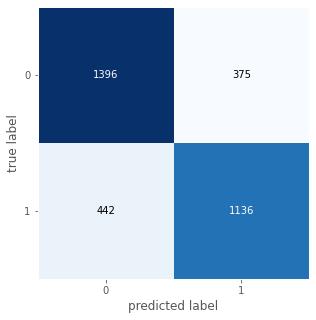

In [31]:
# Show the Confussion Matrix
cm4 = metrics.confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm4, figsize=(5,5))
plt.show()

###### Classification Report

Menampilkan perhitungan akurasi, *precision, recall, f1-score*, dan *cohens kappa score* sebagai performansi model yang telah dibangun.

In [32]:
# Print Classification Report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1771
           1       0.75      0.72      0.74      1578

    accuracy                           0.76      3349
   macro avg       0.76      0.75      0.75      3349
weighted avg       0.76      0.76      0.76      3349



In [33]:
# Show the Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
prec_knn = metrics.precision_score(y_test, y_pred_knn)
rec_knn = metrics.recall_score(y_test, y_pred_knn)
f1_knn = metrics.f1_score(y_test, y_pred_knn)
kappa_knn = metrics.cohen_kappa_score(y_test, y_pred_knn)

print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)
print("Cohens Kappa Score:", kappa_knn)

Accuracy: 0.7560465810689758
Precision: 0.7518199867637326
Recall: 0.7198986058301647
F1 Score: 0.7355131110391712
Cohens Kappa Score: 0.5093321880192133


###### Visualisasi ROC Curve

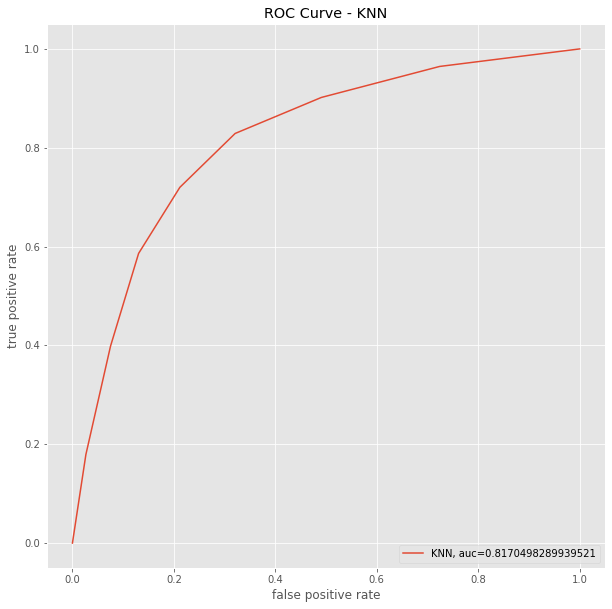

In [34]:
# ROC Curve
y_pred_knn_proba = knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve - KNN')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### Perbandingan Performansi Algoritma

Dilakukan perbandingan performansi model untuk mencari algoritma mana yang memiliki model yang baik.

###### Perbandingan Confusion Matrix

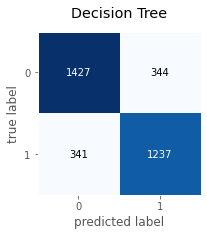

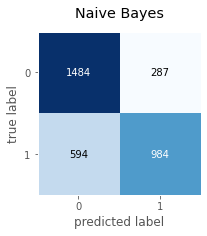

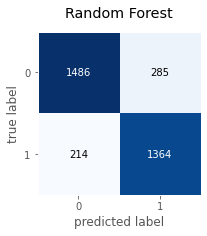

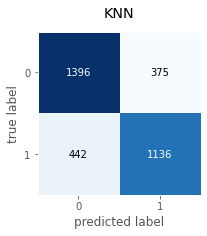

In [35]:
co = [cm1,cm2,cm3,cm4]
tit = ['Decision Tree','Naive Bayes','Random Forest','KNN']
for i in range(0,4):
  fig, ax = plot_confusion_matrix(co[i], figsize=(3,3))
  ax.set_title(tit[i])
plt.show()

###### Perbandingan Classification Report

In [36]:
# Comparing Model Performance
print("Decision Tree Accuracy =",acc_dtc)
print("Decision Tree Precision =",prec_dtc)
print("Decision Tree Recall =",rec_dtc)
print("Decision Tree F1-Score =", f1_dtc)
print("_______________________")
print("Naive Bayes Accuracy =", acc_gnb)
print("Naive Bayes Precision =", prec_gnb)
print("Naive Bayes Recall =", rec_gnb)
print("Naive Bayes F1-Score =", f1_gnb)
print("_______________________")
print("Random Forest Accuracy =", acc_rf)
print("Random Forest Precision =", prec_rf)
print("Random Forest Recall =", rec_rf)
print("Random Forest F1-Score =", f1_rf)
print("_______________________")
print("KNN Accuracy =", acc_knn)
print("KNN Precision =", prec_knn)
print("KNN Recall =", rec_knn)
print("KNN F1-Score =", f1_knn)


Decision Tree Accuracy = 0.7954613317408181
Decision Tree Precision = 0.782416192283365
Decision Tree Recall = 0.7839036755386565
Decision Tree F1-Score = 0.7831592276036721
_______________________
Naive Bayes Accuracy = 0.7369363989250522
Naive Bayes Precision = 0.7741935483870968
Naive Bayes Recall = 0.623574144486692
Naive Bayes F1-Score = 0.6907686907686907
_______________________
Random Forest Accuracy = 0.851000298596596
Random Forest Precision = 0.8271679805942995
Random Forest Recall = 0.8643852978453739
Random Forest F1-Score = 0.8453672141307716
_______________________
KNN Accuracy = 0.7560465810689758
KNN Precision = 0.7518199867637326
KNN Recall = 0.7198986058301647
KNN F1-Score = 0.7355131110391712


In [37]:
print('Decision Tree: \n', metrics.classification_report(y_test, y_pred_dtc))
print("_______________________")
print('Naive Bayes: \n', metrics.classification_report(y_test, y_pred_gnb))
print("_______________________")
print('Random Forest: \n', metrics.classification_report(y_test, y_pred_rf))
print("_______________________")
print('KNN: \n', metrics.classification_report(y_test, y_pred_knn))

Decision Tree: 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1771
           1       0.78      0.78      0.78      1578

    accuracy                           0.80      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.80      0.80      0.80      3349

_______________________
Naive Bayes: 
               precision    recall  f1-score   support

           0       0.71      0.84      0.77      1771
           1       0.77      0.62      0.69      1578

    accuracy                           0.74      3349
   macro avg       0.74      0.73      0.73      3349
weighted avg       0.74      0.74      0.73      3349

_______________________
Random Forest: 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1771
           1       0.83      0.86      0.85      1578

    accuracy                           0.85      3349
   macro avg       0.85      0.

###### Perbandingan ROC Curve

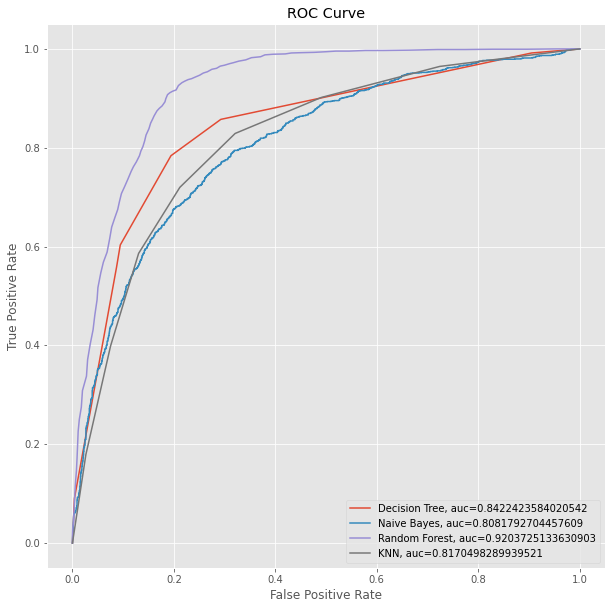

In [38]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.plot(fprrf,tprrf,label="Random Forest, auc="+str(aucrf))
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [46]:
# Create Datafame Contains Fature and Result of prediction
df_compare = X_test.copy()
df_compare['ActualClass'] = y_test
df_compare['DecisonTree'] = y_pred_dtc
df_compare['NaiveBayes'] = y_pred_gnb
df_compare['RandomForest'] = y_pred_rf
df_compare['KNN'] = y_pred_knn

In [47]:
df_compare.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ActualClass,DecisonTree,NaiveBayes,RandomForest,KNN
1402,50,414,3,707,1,302,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,1,1
9326,25,-289,13,56,2,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
3380,84,81204,1,390,1,94,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,1,0
7413,45,999,16,656,2,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,1
10309,30,19358,19,258,2,-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,1,0


## Kesimpulan

Berdasarkan perbandingan 4 model yang telah dilakukan, didapatkan hasil terbaik yaitu performansi pada Random Forest. Hal ini berarti Random Forest adalah algoritma klasifikasi paling baik untuk prediksi menggunakan dataset bank.csv. Berikut merupakan rincian performansi yang telah dihitung. <br>
Accuracy Random Forest = 85,10%, <br>
Precision Random Forest = 82.72%, <br>
Recall Random Forest = 86.44%%, <br>
F1-Score Random Forest = 84.54%, <br>
AUC Random Forest = 92.04%.

### Hyperparameter Tuning Random Forest

In [39]:
n = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

In [40]:
random_grid = {'n_estimators': n}
# Create a based model
rf = RandomForestClassifier()

In [41]:
# Instantiate the grid search model
rf_randoms = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 6, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_randoms.fit(X_test, y_test)

Fitting 6 folds for each of 20 candidates, totalling 120 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   47.8s finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [42]:
#@title Default title text
print("Jumlah Pohon Optimal:") # print best parameter after tuning 
print(rf_randoms.best_params_)
print("Parameter Lain yang Digunakan:") # Print how our model looks after hyper-parameter tuning 
print(rf_randoms.best_estimator_)

Jumlah Pohon Optimal:
{'n_estimators': 90}
Parameter Lain yang Digunakan:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Berdasarkan hyperparameter diatas, parameter n_estimator yang akan digunakan untuk klasifikasi adalah n_estimator = 90